In [1]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats
import IBD_RF_functions


In [2]:
data = pd.read_csv("./data/IBD_data_cleaned.csv",index_col=0)
data

,age,aweekend,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dxccs1,...,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4,steroid_use,abd_pain_adm,aki_adm,gi_bleed_adm
0,89,1,1.071937,5.0,3,1,372,30,372,135.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
4,65,0,1.919980,1.0,5,2,387,30,387,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0
19,84,0,2.155742,6.0,5,2,690,30,690,159.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
22,62,0,1.863343,5.0,2,1,853,30,853,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
23,40,0,1.509554,1.0,3,1,389,30,389,145.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
30,68,1,2.148695,6.0,5,2,854,30,854,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
31,25,1,2.079331,1.0,2,1,385,30,385,144.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0
32,82,0,1.814426,6.0,5,2,247,30,247,100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
33,68,1,1.954297,5.0,2,1,557,30,557,211.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0
38,60,0,3.040344,1.0,1,1,385,30,385,144.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0


In [3]:
all_possible_features = ['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

## Univariate Analysis

In [4]:
from scipy.stats import mannwhitneyu
import sys
from statsmodels.stats.multitest import fdrcorrection
target_column = "ibd_readm"
mann_whitney_univariate_df_dict = {"column":[],
                                   "p-value":[],
                                   "U":[],
                                   "avg_readmit":[],
                                   "95%CI_low_readmit":[],
                                   "95%CI_high_readmit":[],
                                   "avg_no_readmit":[],
                                   "95%CI_low_no_readmit":[],
                                   "95%CI_high_no_readmit":[]}
readmit_pts = data.loc[data[target_column]==1].index
not_readmit_pts = data.loc[data[target_column]==0].index

for column_name in all_possible_features: #data.columns:
    mann_whitney_univariate_df_dict["column"].append(column_name)
    readmit_values = data.loc[readmit_pts][column_name].values
    not_readmit_values = data.loc[not_readmit_pts][column_name].values
    U = np.nan
    p_value = np.nan
    try:
        U,p_value = mannwhitneyu(not_readmit_values,readmit_values)
    except:
        a=1
        #print("Error: {}".format(sys.exc_info()[0]))
    mann_whitney_univariate_df_dict["U"].append(U)
    mann_whitney_univariate_df_dict["p-value"].append(p_value)
    avg_readmit,CI_low_readmit,CI_high_readmit = IBD_RF_functions.mean_confidence_interval(readmit_values, confidence=0.95)
    mann_whitney_univariate_df_dict["avg_readmit"].append(avg_readmit)
    mann_whitney_univariate_df_dict["95%CI_low_readmit"].append(CI_low_readmit)
    mann_whitney_univariate_df_dict["95%CI_high_readmit"].append(CI_high_readmit)
    
    avg_not_readmit,CI_low_not_readmit,CI_high_not_readmit = IBD_RF_functions.mean_confidence_interval(readmit_values, confidence=0.95)
    mann_whitney_univariate_df_dict["avg_no_readmit"].append(avg_readmit)
    mann_whitney_univariate_df_dict["95%CI_low_no_readmit"].append(CI_low_readmit)
    mann_whitney_univariate_df_dict["95%CI_high_no_readmit"].append(CI_high_readmit)
mann_whitney_univariate_df = pd.DataFrame(mann_whitney_univariate_df_dict).set_index("column")

p_values_no_nas = mann_whitney_univariate_df["p-value"].dropna()

B_H_corrected_p_value_results = fdrcorrection(p_values_no_nas,alpha=0.05)


B_H_correction_df = pd.DataFrame({"B-H_corrected_is_significant":pd.Series(B_H_corrected_p_value_results[0]),"B-H_corrected_p_val":pd.Series(B_H_corrected_p_value_results[1]),"column":p_values_no_nas.index}).set_index("column")

mann_whitney_univariate_df = pd.concat([mann_whitney_univariate_df,B_H_correction_df],axis=1)
mann_whitney_univariate_df.to_csv("./results/features_univariate_result.csv")

#mann_whitney_univariate_df = pd.read_csv("./results/features_univariate_result.csv",index_col=0)
mann_whitney_univariate_df

C:\Users\computer\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,p-value,U,avg_readmit,95%CI_low_readmit,95%CI_high_readmit,avg_no_readmit,95%CI_low_no_readmit,95%CI_high_no_readmit,B-H_corrected_is_significant,B-H_corrected_p_val
age,4.865660e-01,166446743.5,56.959555,56.669520,57.249590,56.959555,56.669520,57.249590,False,4.905069e-01
aweekend,4.193878e-03,164603021.0,0.215853,0.209477,0.222229,0.215853,0.209477,0.222229,True,7.844105e-03
blood_transfusion,3.598594e-15,162004199.5,0.138401,0.133049,0.143753,0.138401,0.133049,0.143753,True,1.652082e-14
cardiac_adm,7.733670e-02,165894626.0,0.056823,0.053235,0.060411,0.056823,0.053235,0.060411,False,1.079241e-01
cc_index,4.107987e-87,148115440.0,1.244983,1.217306,1.272661,1.244983,1.217306,1.272661,True,2.074533e-85
chronic_pain,1.707611e-25,163454978.5,0.038882,0.035886,0.041878,0.038882,0.035886,0.041878,True,1.231919e-24
cm_aids,4.065006e-01,166465376.0,0.001438,0.000851,0.002025,0.001438,0.000851,0.002025,False,4.486814e-01
cm_alcohol,1.661329e-02,165819117.0,0.034819,0.031978,0.037660,0.034819,0.031978,0.037660,True,2.805523e-02
cm_anemdef,5.488985e-39,156581592.0,0.286616,0.279608,0.293624,0.286616,0.279608,0.293624,True,5.543875e-38
cm_arth,6.559509e-05,164943521.5,0.061074,0.057363,0.064785,0.061074,0.057363,0.064785,True,1.540722e-04


In [5]:
target_column = "ibd_readm"
data_no_target_column_df = data[[c for c in data.columns if c != target_column]]
data_no_target_column_df.shape

(36811, 263)

In [7]:
known_values_univariate_significant = list(mann_whitney_univariate_df.loc[mann_whitney_univariate_df["B-H_corrected_p_val"]<0.05].index)


In [ ]:
mann_whitney_univariate_df.to_csv("./results/Supplemental_Table_1_Univariate_Results.csv")

In [11]:
target_column = "ibd_readm"
data_known_features_no_target_column_df = data[[c for c in known_values_univariate_significant if c != target_column]]

## Set up for Grid Search CV

In [12]:
from sklearn.model_selection import train_test_split

X_train_known_features, X_test_known_features, y_train_known_features, y_test_known_features = train_test_split(data_known_features_no_target_column_df, data[target_column],train_size=0.5)

## Optimum Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15,20, 25, 30, 50, 100, None],
             'criterion':["gini","entropy"],
              #'min_samples_split':np.arange(2,101,4),
              #'min_samples_leaf':np.arange(2,101,4),
              'max_features':['auto','sqrt','log2',None,10,20,30,40,50],
              'max_leaf_nodes':[None,2,20,50,100,1000],
              'class_weight':['balanced','balanced_subsample']
             }
rf_to_tune = RandomForestClassifier()
#ccp_alpha excluded since overfitting not an issue
grid = GridSearchCV(rf_to_tune,param_grid, verbose=3,n_jobs=12)
grid.fit(X_train_known_features, y_train_known_features)

In [ ]:
pd.DataFrame(grid.cv_results_).to_csv("./optimal_hyperparameters_multifactorial_experiments/Supplemental_Table_2_random_forest_hyperparameter_optimization.csv")
print(grid.best_params_)
print(grid.best_score_)

In [26]:
optimum_RF_parameters = {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 1000, 'n_estimators': 150}

RF_scores_series, RF_feature_importances_df = IBD_RF_functions.repeatedly_train_test_random_forest_model(data_known_features_no_target_column_df,
                                                                 data[target_column],
                                                                 n_iterations=100,
                                                                 train_proportion=0.5,
                                                                 params_dict = optimum_RF_parameters,
                                                                 n_jobs=12)
RF_feature_importances_df.to_csv("./feature_importances/best_RF_12-9-2020.csv")

#RF_feature_importances_df = pd.read_csv("./feature_importances/best_RF_12-9-2020.csv",index_col=0)
RF_feature_importances_df

Done with iteration 1/100
Done with iteration 2/100
Done with iteration 3/100
Done with iteration 4/100
Done with iteration 5/100
Done with iteration 6/100
Done with iteration 7/100
Done with iteration 8/100
Done with iteration 9/100
Done with iteration 10/100
Done with iteration 11/100
Done with iteration 12/100
Done with iteration 13/100
Done with iteration 14/100
Done with iteration 15/100
Done with iteration 16/100
Done with iteration 17/100
Done with iteration 18/100
Done with iteration 19/100
Done with iteration 20/100
Done with iteration 21/100
Done with iteration 22/100
Done with iteration 23/100
Done with iteration 24/100
Done with iteration 25/100
Done with iteration 26/100
Done with iteration 27/100
Done with iteration 28/100
Done with iteration 29/100
Done with iteration 30/100
Done with iteration 31/100
Done with iteration 32/100
Done with iteration 33/100
Done with iteration 34/100
Done with iteration 35/100
Done with iteration 36/100
Done with iteration 37/100
Done with 

C:\Users\computer\Desktop\scratchpad\IBD_project\IBD_RF_functions.py:91: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  feature_importances_df = pd.concat(feature_importance_df_lst,axis=1)


,importance,importance.1,importance.2,importance.3,importance.4,importance.5,importance.6,importance.7,importance.8,importance.9,...,importance.90,importance.91,importance.92,importance.93,importance.94,importance.95,importance.96,importance.97,importance.98,importance.99
aweekend,0.018397,0.019034,0.019029,0.018959,0.018627,0.018303,0.019399,0.019002,0.018748,0.019107,...,0.019111,0.018389,0.018542,0.019353,0.019215,0.018744,0.018735,0.019032,0.018292,0.019055
blood_transfusion,0.016322,0.015948,0.016579,0.016077,0.015322,0.016224,0.016332,0.015868,0.016115,0.015999,...,0.015601,0.016212,0.015790,0.016216,0.015675,0.015638,0.015754,0.016265,0.016533,0.016863
cc_index,0.046528,0.046336,0.045896,0.046512,0.046565,0.046076,0.044486,0.046016,0.046254,0.045323,...,0.046896,0.046717,0.047920,0.048108,0.045524,0.046525,0.047600,0.047640,0.045679,0.046447
chronic_pain,0.010299,0.010244,0.010391,0.010145,0.009374,0.009861,0.010137,0.010141,0.010164,0.010286,...,0.010440,0.009837,0.009873,0.009815,0.009836,0.010231,0.010073,0.009659,0.010160,0.010178
cm_alcohol,0.008044,0.008295,0.008387,0.008236,0.008016,0.008323,0.008758,0.008579,0.008578,0.008134,...,0.008122,0.008306,0.008303,0.008750,0.008578,0.007920,0.008165,0.008680,0.008124,0.008454
cm_anemdef,0.024082,0.024316,0.024087,0.023663,0.023804,0.024054,0.024830,0.025015,0.024670,0.024778,...,0.023909,0.024590,0.023685,0.023948,0.024299,0.024251,0.023755,0.024397,0.023645,0.024087
cm_arth,0.011964,0.011376,0.011175,0.011525,0.011135,0.012058,0.011454,0.011360,0.011086,0.011281,...,0.011219,0.011552,0.012047,0.011878,0.011611,0.011785,0.011578,0.011496,0.011303,0.010864
cm_chf,0.010365,0.010166,0.010628,0.010435,0.010432,0.010098,0.010348,0.010571,0.010731,0.010859,...,0.011095,0.010680,0.010663,0.010417,0.010382,0.010207,0.010625,0.011045,0.010876,0.011311
cm_chrnlung,0.015248,0.015600,0.015702,0.015489,0.016039,0.015522,0.014770,0.015961,0.015287,0.015315,...,0.015820,0.016248,0.015618,0.015509,0.015353,0.015753,0.015658,0.015129,0.015630,0.016919
cm_depress,0.018561,0.018051,0.017455,0.018018,0.017659,0.018267,0.017832,0.018651,0.018469,0.017743,...,0.018306,0.017986,0.018191,0.018645,0.018567,0.018232,0.018252,0.018595,0.019165,0.018156


## P-value/Feature Importance Correlation

In [18]:
feature_importance_with_CI_df_dict = {"feature":[],"mean_score":[],"95%CI":[],"log_importance":[],"log_95%CI":[]}
for feature_index in RF_feature_importances_df.index:
    feature_importance_series = RF_feature_importances_df.loc[feature_index]
    mean,CI_lower,CI_upper = IBD_RF_functions.mean_confidence_interval(feature_importance_series, confidence=0.95)
    log_mean,log_CI_lower,log_CI_upper = IBD_RF_functions.mean_confidence_interval(np.log10(feature_importance_series), confidence=0.95)
    feature_importance_with_CI_df_dict["feature"].append(feature_index)
    feature_importance_with_CI_df_dict["mean_score"].append(mean)
    feature_importance_with_CI_df_dict["95%CI"].append(CI_upper-mean)
    feature_importance_with_CI_df_dict["log_importance"].append(log_mean)
    feature_importance_with_CI_df_dict["log_95%CI"].append(log_CI_upper-log_mean)
feature_importance_with_CI_df = pd.DataFrame(feature_importance_with_CI_df_dict).set_index("feature")
feature_importance_with_CI_df

,mean_score,95%CI,log_importance,log_95%CI
feature,,,,
aweekend,0.018872,0.000072,-1.724269,0.001652
blood_transfusion,0.016171,0.000072,-1.791382,0.001939
cc_index,0.046546,0.000202,-1.332218,0.001898
chronic_pain,0.010074,0.000051,-1.996953,0.002222
cm_alcohol,0.008289,0.000041,-2.081629,0.002154
cm_anemdef,0.024169,0.000086,-1.616815,0.001534
cm_arth,0.011501,0.000062,-1.939407,0.002343
cm_chf,0.010515,0.000055,-1.978326,0.002260
cm_chrnlung,0.015528,0.000072,-1.808991,0.002001


In [19]:

feature_p_vals = mann_whitney_univariate_df.loc[feature_importance_with_CI_df.index]["B-H_corrected_p_val"]
feature_importance_with_CI_p_val_df = pd.concat([feature_importance_with_CI_df,feature_p_vals],axis=1)
feature_importance_with_CI_p_val_df["log_pvals"] = np.log10(feature_importance_with_CI_p_val_df["B-H_corrected_p_val"])
feature_importance_with_CI_p_val_df

,mean_score,95%CI,log_importance,log_95%CI,B-H_corrected_p_val,log_pvals
feature,,,,,,
aweekend,0.018872,0.000072,-1.724269,0.001652,7.844105e-03,-2.105457
blood_transfusion,0.016171,0.000072,-1.791382,0.001939,1.652082e-14,-13.781968
cc_index,0.046546,0.000202,-1.332218,0.001898,2.074533e-85,-84.683080
chronic_pain,0.010074,0.000051,-1.996953,0.002222,1.231919e-24,-23.909418
cm_alcohol,0.008289,0.000041,-2.081629,0.002154,2.805523e-02,-1.551986
cm_anemdef,0.024169,0.000086,-1.616815,0.001534,5.543875e-38,-37.256187
cm_arth,0.011501,0.000062,-1.939407,0.002343,1.540722e-04,-3.812276
cm_chf,0.010515,0.000055,-1.978326,0.002260,7.532693e-19,-18.123050
cm_chrnlung,0.015528,0.000072,-1.808991,0.002001,1.168784e-16,-15.932266


In [20]:
feature_importance_with_CI_p_val_df["importance_rank"] = feature_importance_with_CI_p_val_df["mean_score"].rank(ascending = False)
feature_importance_with_CI_p_val_df["p_val_rank"] = feature_importance_with_CI_p_val_df["B-H_corrected_p_val"].rank()
feature_importance_with_CI_p_val_df.to_csv("./results/p_val_vs_feature_importance_12-8-2020.csv")
feature_importance_with_CI_p_val_df

,mean_score,95%CI,log_importance,log_95%CI,B-H_corrected_p_val,log_pvals,importance_rank,p_val_rank
feature,,,,,,,,
aweekend,0.018872,0.000072,-1.724269,0.001652,7.844105e-03,-2.105457,14.0,54.0
blood_transfusion,0.016171,0.000072,-1.791382,0.001939,1.652082e-14,-13.781968,19.0,22.0
cc_index,0.046546,0.000202,-1.332218,0.001898,2.074533e-85,-84.683080,3.0,2.0
chronic_pain,0.010074,0.000051,-1.996953,0.002222,1.231919e-24,-23.909418,40.0,14.0
cm_alcohol,0.008289,0.000041,-2.081629,0.002154,2.805523e-02,-1.551986,43.0,59.5
cm_anemdef,0.024169,0.000086,-1.616815,0.001534,5.543875e-38,-37.256187,10.0,10.0
cm_arth,0.011501,0.000062,-1.939407,0.002343,1.540722e-04,-3.812276,34.0,43.0
cm_chf,0.010515,0.000055,-1.978326,0.002260,7.532693e-19,-18.123050,38.0,17.0
cm_chrnlung,0.015528,0.000072,-1.808991,0.002001,1.168784e-16,-15.932266,20.0,18.0


In [21]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(feature_importance_with_CI_p_val_df["importance_rank"],feature_importance_with_CI_p_val_df["p_val_rank"])
print("Best Fit Line: y = {}x+{}".format(slope,intercept))
print("R2 = {}".format(r_value**2))
print("p-value = {}".format(p_value))

Best Fit Line: y = 0.6683034927350104x+10.448439978847173
R2 = 0.4466858004758587
p-value = 2.930316714537864e-09


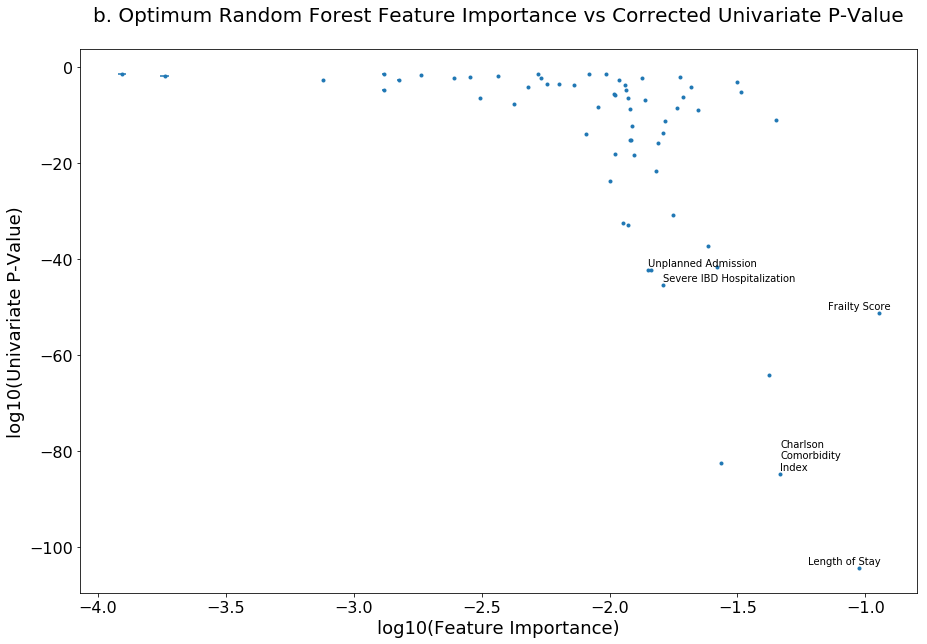

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
features_to_highlight = ['los', 'cc_index', 'unplanned_adm', 'frailty_risk_score', 'severe_IBD_hospitalization']
annotation_dict = {'los':"Length of Stay",
                   'cc_index':"Charlson\nComorbidity\nIndex",
                   'unplanned_adm':"Unplanned Admission",
                   'frailty_risk_score':"Frailty Score",
                   'severe_IBD_hospitalization':"Severe IBD Hospitalization"}

x_offset_dict = {'los':0.2,
                   'cc_index':0.,
                   'unplanned_adm':0.,
                   'frailty_risk_score':0.2,
                   'severe_IBD_hospitalization':0.}

plt.errorbar(feature_importance_with_CI_p_val_df["log_importance"],
             feature_importance_with_CI_p_val_df["log_pvals"],
             xerr=feature_importance_with_CI_p_val_df["log_95%CI"], fmt='.')

for feature_to_highlight in features_to_highlight:
    x_coord = feature_importance_with_CI_p_val_df.loc[feature_to_highlight]["log_importance"]
    y_coord = feature_importance_with_CI_p_val_df.loc[feature_to_highlight]["log_pvals"]
    ax.annotate(annotation_dict[feature_to_highlight], (x_coord-x_offset_dict[feature_to_highlight], y_coord+0.8))
#plt.plot(sig_p_val_x,sig_p_val,'b')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.title("b. Optimum Random Forest Feature Importance vs Corrected Univariate P-Value\n", fontsize = 20)
plt.ylabel('log10(Univariate P-Value)', fontsize = 18)

plt.xlabel('log10(Feature Importance)', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

## Logistic Regression

In [ ]:
param_grid_logistic = {'penalty': ['l2','l1','elasticnet','none'],
              'C': [2.0,1.0,0.75,0.5,0.25],
              'class_weight':[None,'balanced'],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'fit_intercept':[True,False],
              #'multi_class':['auto'],
              'l1_ratio':[None,0.25,0.5,0.75]
                 }

In [ ]:
from sklearn.linear_model import LogisticRegression

'''X_train_known_features, X_test_known_features, y_train_known_features, y_test_known_features = train_test_split(H_matrix_df.T, data[target_column], random_state=42,train_size=0.5)'''


IBD_LR_CLF = LogisticRegression()
#IBD_LR_CLF.fit(X_train_known_features, y_train_known_features)
#IBD_LR_CLF.score(X_test_known_features,y_test_known_features)
grid_LR = GridSearchCV(IBD_LR_CLF,param_grid_logistic, verbose=3,n_jobs=12,error_score=np.nan)
grid_LR.fit(X_train_known_features, y_train_known_features)

In [ ]:
pd.DataFrame(grid_LR.cv_results_).to_csv("./optimal_hyperparameters_multifactorial_experiments/logistic_regression_multifactorial_12-9-2020.csv")
print(grid_LR.best_params_)
print(grid_LR.best_score_)

In [23]:
%load_ext autoreload

%autoreload 2
#import IBD_RF_functions
optimum_logistic_regression_parameters = {'C': 0.5,
                                          'class_weight': None,
                                          'fit_intercept': False,
                                          'l1_ratio': None,
                                          'penalty': 'l2',
                                          'solver': 'lbfgs'}

LR_scores,LR_feature_coeff_dicts = IBD_RF_functions.repeatedly_train_test_logistic_regression_model(data_known_features_no_target_column_df,
                                                                 data[target_column],
                                                                 n_iterations=100,
                                                                 train_proportion = 0.5,
                                                                 params_dict = optimum_logistic_regression_parameters,
                                                                 n_jobs=12,
                                                                 random_state=42
                                                                )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done with iteration 1/100
Done with iteration 2/100
Done with iteration 3/100
Done with iteration 4/100
Done with iteration 5/100
Done with iteration 6/100
Done with iteration 7/100
Done with iteration 8/100
Done with iteration 9/100
Done with iteration 10/100
Done with iteration 11/100
Done with iteration 12/100
Done with iteration 13/100
Done with iteration 14/100
Done with iteration 15/100
Done with iteration 16/100
Done with iteration 17/100
Done with iteration 18/100
Done with iteration 19/100
Done with iteration 20/100
Done with iteration 21/100
Done with iteration 22/100
Done with iteration 23/100
Done with iteration 24/100
Done with iteration 25/100
Done with iteration 26/100
Done with iteration 27/100
Done with iteration 28/100
Done with iteration 29/100
Done with iteration 30/100
Done with iteration 31/100
Done with iteration 32/100
Done with iteration 33/100
Done with iteration 34/100
Don

C:\Users\computer\Desktop\scratchpad\IBD_project\IBD_RF_functions.py:140: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  feature_coeff_df = pd.concat(feature_coeff_df_lst,axis=1)


## Comparison between Random Forest and Logistic Regression

In [24]:
def significant_digits_number_formatter(num_in,n_sig_figs=4):
    output_template = ("{0:."+str(n_sig_figs)+"g}")
    return output_template.format(num_in)

Random Forest:
Avg: 0.5878441812452462 CI: 0.5875407548491656 - 0.5881476076413268

Logistic Regression:
Avg: 0.5965755731826577 CI: 0.5960657874020641 - 0.5970853589632514

p = 1.8278836218208918e-34

Difference of Means: 0.00873139193741157


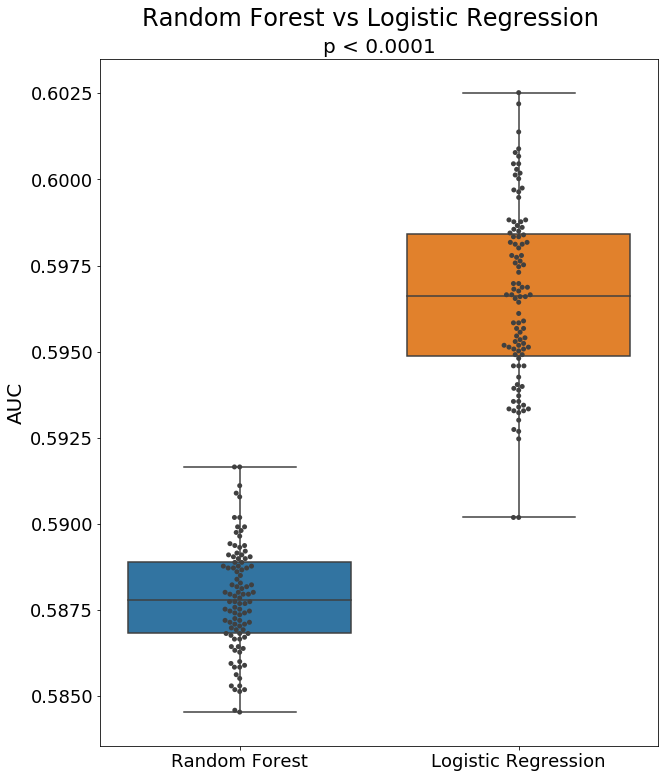

In [27]:
main_title_txt_size = 24
p_val_txt_size = 8
axis_label_txt_size = 20
axis_number_txt_size = 18
top_adj_parameter = 0.92
fig_size = (10,12)

from scipy.stats import mannwhitneyu
U,p_value = mannwhitneyu(LR_scores,RF_scores_series)

RF_mean,RF_CI_low,RF_CI_high = IBD_RF_functions.mean_confidence_interval(RF_scores_series, confidence=0.95)
LR_mean,LR_CI_low,LR_CI_high = IBD_RF_functions.mean_confidence_interval(LR_scores, confidence=0.95)

print("Random Forest:")

print("Avg: {} CI: {} - {}".format(RF_mean,RF_CI_low,RF_CI_high))
print("")
print("Logistic Regression:")
#print("p = {}".format(p_value))
print("Avg: {} CI: {} - {}".format(LR_mean,LR_CI_low,LR_CI_high))
print("")
print("p = {}".format(p_value))
print("")
print("Difference of Means: {}".format(LR_mean-RF_mean))
fig, ax = plt.subplots(figsize=fig_size)
fig.suptitle('Random Forest vs Logistic Regression',fontsize=main_title_txt_size)
             
data_to_plot_df = pd.DataFrame({"Random Forest":RF_scores_series,"Logistic Regression":LR_scores})
             
fig.subplots_adjust(top=top_adj_parameter)
#ax.set_title("p = {}".format(significant_digits_number_formatter(p_value)), fontsize=p_val_txt_size)
if p_value < 0.0001:
    ax.set_title("p < 0.0001", fontsize=p_val_txt_size)
else:
    ax.set_title("p = {}".format(significant_digits_number_formatter(p_value)), fontsize=p_val_txt_size)
ax.set_ylabel("AUC")
ax = sns.boxplot(data=data_to_plot_df[["Random Forest","Logistic Regression"]],fliersize=0)
ax = sns.swarmplot(data=data_to_plot_df[["Random Forest","Logistic Regression"]], color=".25")
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(axis_number_txt_size)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(axis_label_txt_size)

plt.show()